In [2]:
"""
=========================================================
Visualization of reservoir neurons activity example
=========================================================

This example shows how to access the time series of the 
reservoir neurons activity during the prediction phase.

We use the ESNGenerator model as a pattern generator that
learns to predict future steps of the chaotic time series
[Mackey-Glass](http://www.scholarpedia.org/article/Mackey-Glass_equation) 
Then we plot some randomly picked neurons from the reservoir.
"""

import numpy as np
from sklearn.model_selection import train_test_split

from echoes import ESNGenerator
from echoes.datasets import load_mackeyglasst17
from echoes.plotting import (
    set_mystyle, 
    plot_reservoir_activity, 
    plot_predicted_ts
)

set_mystyle()  # just aesthetics


# Load data and define train/test length
data = load_mackeyglasst17().reshape(-1, 1)
n_train_steps, n_test_steps = 2000, 2000
n_total_steps = n_train_steps + n_test_steps

y_train, y_test = train_test_split(
    data, 
    train_size=n_train_steps, 
    test_size=n_test_steps, 
    shuffle=False
)

# Instantiate model
esn = ESNGenerator(
    n_reservoir=200,
    n_steps=n_test_steps,
    spectral_radius=1.25,
    leak_rate=.4,
    regression_method="pinv",
    store_states_pred=True,   # store states to plot later
    random_state=42,    
).fit(None, y=y_train)

prediction = esn.predict()

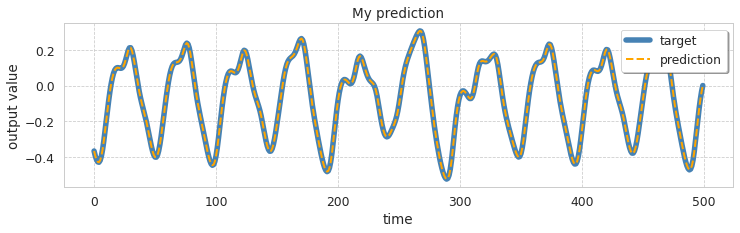

In [3]:
ax = plot_predicted_ts(
    y_test, 
    prediction, 
    end=500,
    figsize=(12, 3)
)   
# We can customize the plot
ax.set_title("My prediction")
ax.legend(loc=1, fancybox=True, shadow=True)

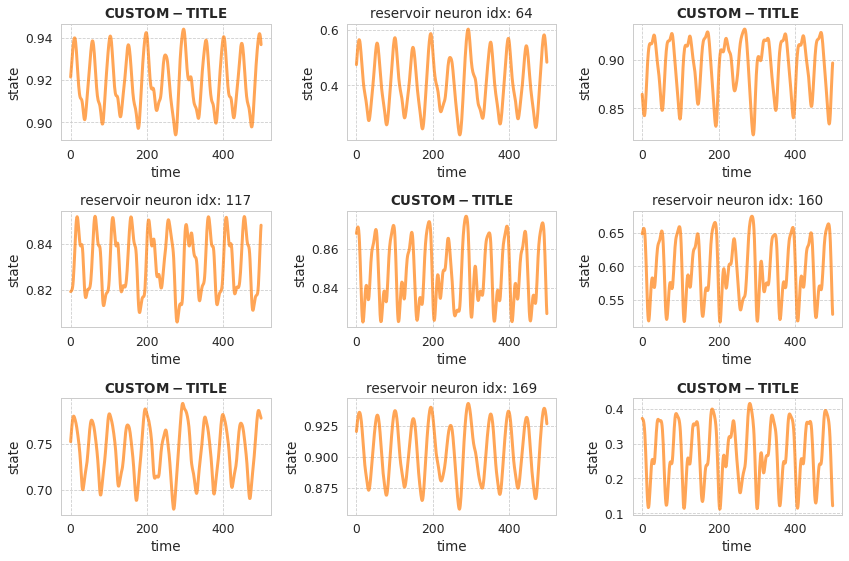

In [4]:
# Pick 9 random neurons to plot
neurons_to_plot = sorted(np.random.randint(0, esn.n_reservoir, size=9))

# This plots the activity and return the fig object for finetuning
fig = plot_reservoir_activity(
    esn,   
    neurons_to_plot,
    pred=True,   # plot activity during prediction
    end=500,
    figsize=(12, 8),
    color="tab:orange",
    alpha=.7
)

# Optional finetuning
for i, ax in enumerate(fig.axes):
    if i % 2 == 0:
        ax.set_title("$\\bf{CUSTOM-TITLE}$")